# Introduction

Data mining is a data-driven process of automatically or semi-automatically discovering meaningful and useful information hidden in large data repositories for decision making

Large sets of data, accumulated, sustainably
Automatically, computerised
Previously unknown information
Use of analytical tools to identify the underlying rules, patterns, regularities and features in the data
Domain-specific
The significance of an analysis depends on how much influence it has on decision-making 
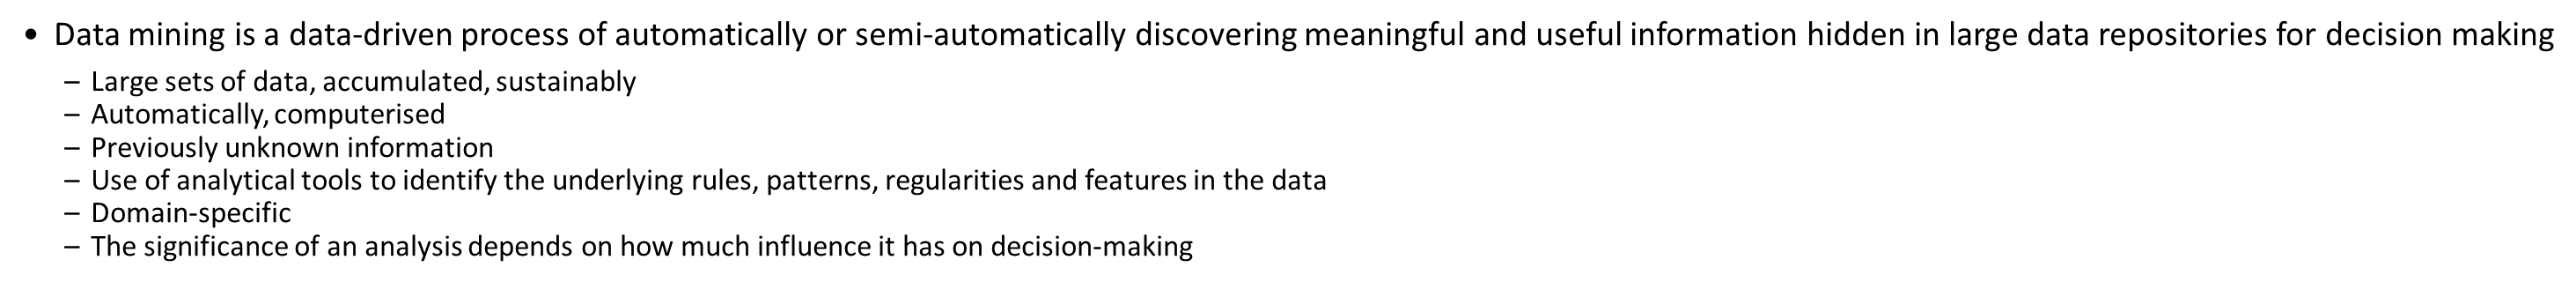

# Objectives of CRISP-DM
To thoroughly understand, from a business perspective, what the client really wants to accomplish, their business goals, resources, and constraints
To translate these goals and restrictions into a data mining problem definition
To produce a preliminary plan for achieving the data mining goals and the business goals
Outputs
Statement of primary business objectives
Statement of data mining objectives
Statement of successful criteria
Example
Business goal: “To increase first-year student progression by 10%”
Data mining goal: “To predict and identify student at-risk”

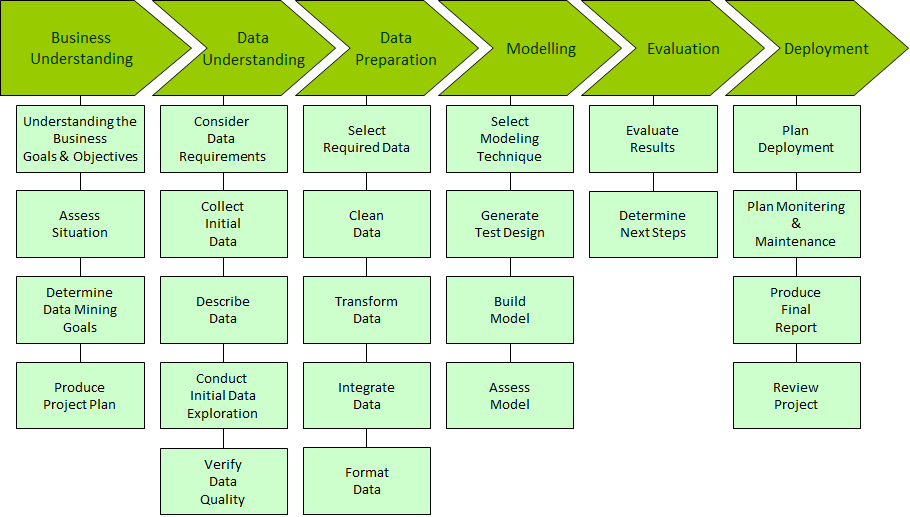

## Phase 1 Business Understanding
THE BUSINESS CONTEXT OF THE DATA.
This task aims to identify from the wine quality dataset (Red) with an in-depth understanding of the physicochemical composition that makes wine production quality and investigate the expert sense of judgement on the quality rating 0 - 10. 

The aim as mentioned above will describe and advise on the best option for
●	Make the manufacturers understand the science behind wine quality perception to align their product to meet consumer’s needs and wants.
●	It presents insights into which areas wine manufactures should focus their attention
●	 It gives the manufactures a hint on consumer’s likelihood, preference and willingness to purchase wine with a specific physicochemical mixture.
●	It will give an edge to the producers over other competitors.


## Phase 2 Data Uderstanding
Two public datasets that are concerned with the quality of wine are known as “Red and White” from wine samples. Our focus in this project is the Red sample variants from Portugal “Vinho Verde” wine. The dataset has an input (PH value) and output (grading) formulated by experts by assigning the values 3 to 8, where three means terrible, and eight means excellent. There are 1599 observations and 12 attributes. During the pre-processing stage, we will discuss the correlation observed with the attributes and apply feature selection.
Input variables based on the physicochemical test in the datasets are

a)	Fixed Acidity
b)	Volatile Acidity
c)	Citric Acid
d)	Residual
e)	Chlorides
f)	Free Sulphur dioxide
g)	Total Sulphur dioxide
h)	Density
i)	pH
j)	Sulphates
k)	Alcohol



In [1]:
#Importing Library packages.
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install sklearn

In [2]:
Project = pd.read_csv("C:/Users/Giantstride/Downloads/WineQaulity(Red).csv")

In [3]:
Project.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Counter
0,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6,10.10.270.542.30.0657260.995313.170.5312.56,1
1,10.1,0.28,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,6,10.10.280.461.80.055130.99743.040.7910.26,1
2,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7,10.10.310.351.60.0759280.996723.240.8311.27,1
3,10.1,0.31,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6,10.10.310.442.30.0822460.99883.320.679.76,1
4,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7,10.10.370.342.40.0855170.996833.170.6510.67,1


In [4]:
## From above we could see that the headers are not compliance to the naming pattern in Python. This will be manually done by imputing the header with an uderscore
## We create a header list
Headers = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "None_1", "None_2"]
print("Headers\n", Headers)

Headers
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'None_1', 'None_2']


In [5]:
Project.columns = Headers
Project.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,None_1,None_2
0,10.1,0.270,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6,10.10.270.542.30.0657260.995313.170.5312.56,1
1,10.1,0.280,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,6,10.10.280.461.80.055130.99743.040.7910.26,1
2,10.1,0.310,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7,10.10.310.351.60.0759280.996723.240.8311.27,1
3,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6,10.10.310.442.30.0822460.99883.320.679.76,1
4,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7,10.10.370.342.40.0855170.996833.170.6510.67,1
5,10.1,0.380,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,7,10.10.380.52.40.1046130.996433.220.6511.67,1
6,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,10.10.430.42.60.09213520.998343.220.64107,1
7,10.1,0.450,0.23,1.9,0.082,10.0,18.0,0.99774,3.22,0.65,9.3,6,10.10.450.231.90.08210180.997743.220.659.36,1
8,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6,10.10.650.375.10.1111651.00263.320.6410.46,1
9,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3,4,10.10.9350.223.40.10511861.0013.430.6411.34,1


In [6]:
## I want to drop column None_1 and None_2
Project.drop(["None_1", "None_2"], axis = 1, inplace = True) 

In [7]:
Project.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,10.1,0.27,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,6
1,10.1,0.28,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,6
2,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7
3,10.1,0.31,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6
4,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7


In [8]:
## Data Type is necessary to check.
print (Project.dtypes)


fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


It is good to have a better understanding of our dta type.
As we can see above, all our varibales has their correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'.

In [9]:
## This shows 1599 entries and 12 variables in the data set and the number of unique values in our quality data set.
print(Project.shape)
print(Project['quality'].unique())


## Show the count for each of the categoricla data (Quality).
print(Project.groupby("quality").size())

(1599, 12)
[6 7 4 5 8 3]
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


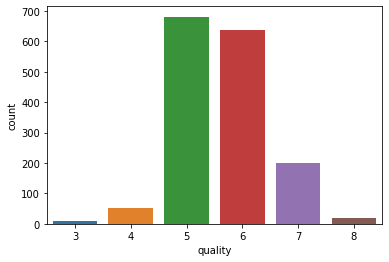

In [10]:
## Since quality is our Target variabels, lets see the variabels are spread across the dataset.

sns.countplot(Project['quality'],label="count")
plt.show()

In [11]:
Project.describe(include = "all")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
## We could use another method to get the information of our dataset
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
## This showed that each row has 1598 entry.

##  Phase 3 DATA PRE-PROCESSING OF WINE QUALITY (RED)
If we consider the cross-industry standard process for data mining model (CRISP-DM) having a six-phase component developed by a group in Europe, data pre-processing is the stage where 80% of the work is done. Some people call it Data wrangling. 
Here we are going to check for missing value.

identify_missing_values

 Evaluting Missing data 

There are two built in function to detect missing data.

.isnull()

.notnull()


In [14]:
missing_data = Project.notnull()
print (missing_data)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              True              True         True            True       True   
1              True              True         True            True       True   
2              True              True         True            True       True   
3              True              True         True            True       True   
4              True              True         True            True       True   
...             ...               ...          ...             ...        ...   
1594           True              True         True            True       True   
1595           True              True         True            True       True   
1596           True              True         True            True       True   
1597           True              True         True            True       True   
1598           True              True         True            True       True   

      free_sulfur_dioxide  

From the above, we dont have missing in our dataset. 

Part of data preprocessing includes:

Standardization: The process of transforming data into a common format. This is not required in this dataset. MOst times data are gotten from different source and each varibale may have different format, hence data standardiation is important.

Normalisation: is the step in transforming values of several variables into a similar range. However, this is not required in ths dataset. The variables and values are physicochemical composition.



#### Outlier

The outlier is a commonly used word for analysis and refers to an appearance that is far away in an entire pattern of a sample. We will explore all  varables with boxplot to discover outlier.

Data point that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) and below the 1st quartile (Q1)


In [15]:
Project.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From our statisticaly explaration we could detect outliers, however, from our data understanding, those points seen on quality 3 and probably 8 could be seen as outlier hence the buiness understanding of this dataset will be defeated. Hence data mining task is a non linear process.

#### Binning
Why binning?

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. From the buisness idea, the aim as mentioned above will describe and advise on the best option for
manufacturers understand the science behind wine quality perception so as to align their product to meet consumer’s needs and wants. the data set has qaulity rated from 3 to 8. we will merge 3 and 4 and call it poor, merge 5 and 6 to be good and merge 7 and 8 to be superior.

In [16]:
bins = np.linspace(min(Project["quality"]), max(Project["quality"]), 4)
bins

array([3.        , 4.66666667, 6.33333333, 8.        ])

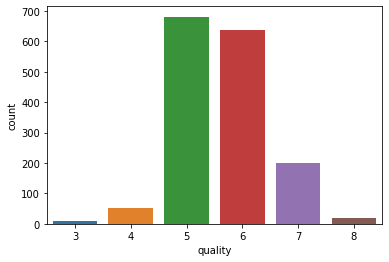

In [17]:
sns.countplot(Project['quality'],label="count")
plt.show()

In [18]:
## This are the group names.
group_names = ['poor', 'Good', 'Superiror']

In [19]:
Project['quality-binned'] = pd.cut(Project['quality'], bins, labels=group_names, include_lowest=True )
Project[['quality','quality-binned']].head(20)

,quality,quality-binned
0,6,Good
1,6,Good
2,7,Superiror
3,6,Good
4,7,Superiror
5,7,Superiror
6,7,Superiror
7,6,Good
8,6,Good
9,4,poor


In [20]:
Project["quality-binned"].value_counts()

Good         1319
Superiror     217
poor           63
Name: quality-binned, dtype: int64

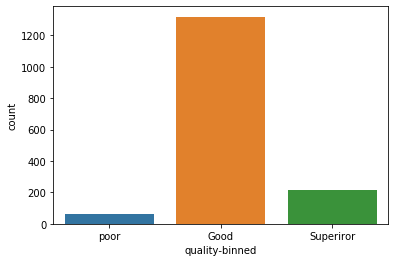

In [21]:
sns.countplot(Project['quality-binned'],label="count")
plt.show()

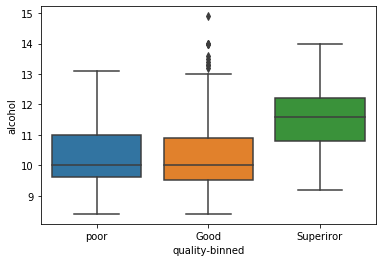

In [22]:
sns.boxplot(x="quality-binned", y="alcohol", data=Project)

#### Analysisng Individual Feature Patterns using visualization
Visualizing individal varaibles will require a great undertsnading in different data type. Since our target variable is a categorical data, we will using box plot to understand the relationship.

In [23]:
Project.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From above the digonal shows one. 

####  Catrgorical Variable
We will use box plot to examine the relation between quality and other physicochemical varables and this will answer the first question as to factors that affect quality of wine. If our target was a contiouns numeriac data, we would have used a regplot. The understanding of data type is paramunt.

#### Quality vs Alcohol

Lets look at the relationship between Quality and Alcoho

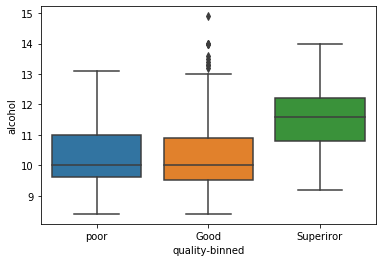

In [24]:
sns.boxplot(x="quality-binned", y="alcohol", data=Project)


We can see that Superior and good are distinct enough that makes  alcohol a good predictor for quality  Wine.

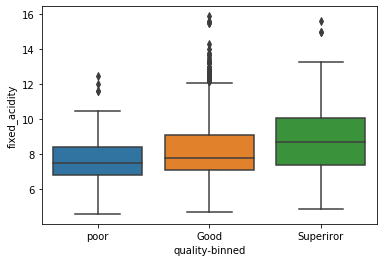

In [25]:
sns.boxplot(x="quality-binned", y="fixed_acidity", data=Project)

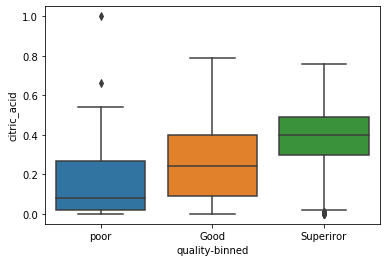

In [26]:
sns.boxplot(x="quality-binned", y="citric_acid", data=Project)

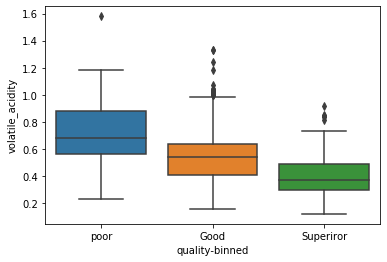

In [27]:
sns.boxplot(x="quality-binned", y="volatile_acidity", data=Project)

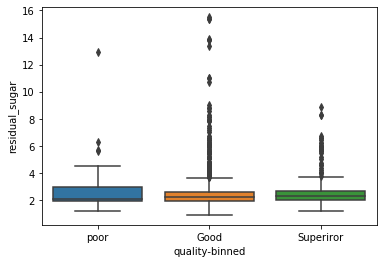

In [28]:
sns.boxplot(x="quality-binned", y="residual_sugar", data=Project)

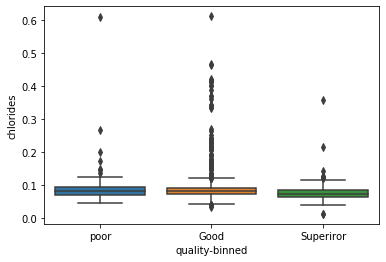

In [29]:
sns.boxplot(x="quality-binned", y="chlorides", data=Project)

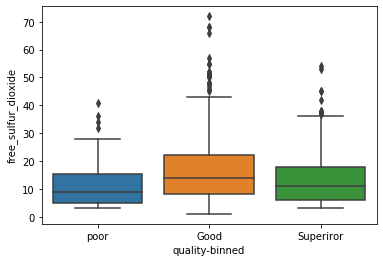

In [30]:
sns.boxplot(x="quality-binned", y="free_sulfur_dioxide", data=Project)

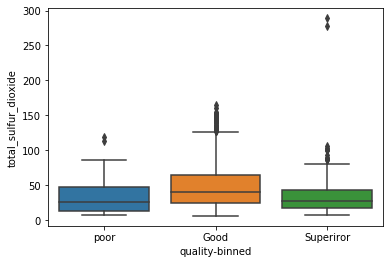

In [31]:
sns.boxplot(x="quality-binned", y="total_sulfur_dioxide", data=Project)

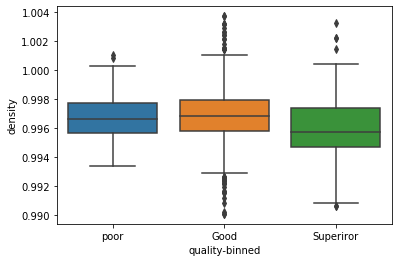

In [32]:
sns.boxplot(x="quality-binned", y="density", data=Project)

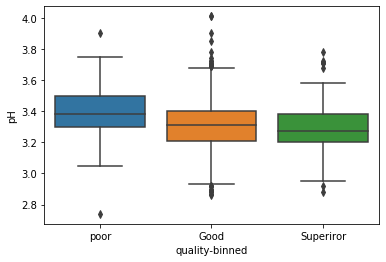

In [33]:
sns.boxplot(x="quality-binned", y="pH", data=Project)

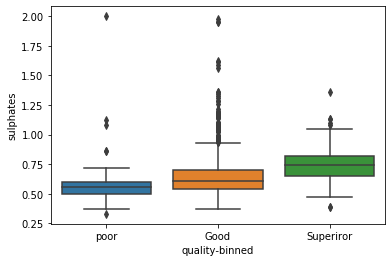

In [34]:
sns.boxplot(x="quality-binned", y="sulphates", data=Project)

#####  In Summary,
we could deduce that good wine are affected by Sulphates,Citric acid, fixed acidity and Alcohol.
We have seen those physicochemical properties that could make a wine good and poort, however some cannot be a good conideration for poor or good.

####  Correlation 
Most times we tend to mix the difference between correlationa dn causation. Correlation is explains the extent of or level of interdependency between two variables.

In bivariante analysis,the word correlation is used to determine the level of relationship or association between two variables. We will x-ray or try to discover if there is an association or correlation between quality and the physicochemical variables in our data set. Bi-variate analysis can be done with continuous and categorical variables. It could be categorical and categorical, continuous and continuous or categorical and continuous.
The correlation falls within +1 and - 1. -1 means the variable has a negative correlation,

+1, means positive correlation and 0 means no correlation. 

Pearson correlation principle states

1 : means postive linear relation
0 No linear correlation
-1 Negative relationship.
Another concept to know is P-value. It is the probability that two variables are signifacnt from a statistics view.

p-value is < 0.001: we say there is strong evidence that the correlation is significant.

p-value is < 0.05: there is moderate evidence that the correlation is significant.

P-value is < 0.1: there is weak evidence that the correlation is significant.

P-value is > 0.1: there is no evidence that the correlation is significant.

In [35]:
## Alcohol 
pearson_coef, p_value = stats.pearsonr(Project['alcohol'], Project['quality'])
print("The Pearson Correlation for Alcohol is", pearson_coef, " P-value for Alcohol  =", p_value)

## Fixed Acidity
pearson_coef, p_value = stats.pearsonr(Project['fixed_acidity'], Project['quality'])
print("The Pearson Correlation for Fixed Acidity is", pearson_coef, " P-value for Fixed Acidity  =", p_value)

## Citric Acid
pearson_coef, p_value = stats.pearsonr(Project['citric_acid'], Project['quality'])
print("The Pearson Correlation for Citric Acid is", pearson_coef, " P-value for Citric Acid  =", p_value)

## Volatile Acidity
pearson_coef, p_value = stats.pearsonr(Project['volatile_acidity'], Project['quality'])
print("The Pearson Correlation for Volatile Acidity is", pearson_coef, " P-value for Volatie Acidity  =", p_value) 

## Residual Sugar
pearson_coef, p_value = stats.pearsonr(Project['residual_sugar'], Project['quality'])
print("The Pearson Correlation for Residual Sugar is", pearson_coef, " P-value for Residual Sugar  =", p_value) 

## Chlorides
pearson_coef, p_value = stats.pearsonr(Project['chlorides'], Project['quality'])
print("The Pearson Correlation for Chlorides is", pearson_coef, " P-value for Chlorides  =", p_value) 

##Sulphates
pearson_coef, p_value = stats.pearsonr(Project['sulphates'], Project['quality'])
print("The Pearson Correlation for Suplhates is", pearson_coef, " P-value for Sulphates =", p_value) 

## Desnsity
pearson_coef, p_value = stats.pearsonr(Project['density'], Project['quality'])
print("The Pearson Correlation for Density is", pearson_coef, " P-value for Density  =", p_value) 

## total_sulfur_dioxide
pearson_coef, p_value = stats.pearsonr(Project['total_sulfur_dioxide'], Project['quality'])
print("The Pearson Correlation for Total Free dioxide is", pearson_coef, " P-value for Total Free dioxide  =", p_value) 

## free_sulfur_dioxide

pearson_coef, p_value = stats.pearsonr(Project['free_sulfur_dioxide'], Project['quality'])
print("The Pearson Correlation for Free Sulfuris", pearson_coef, " P-value for Free Sulfur  =", p_value)

## pH

pearson_coef, p_value = stats.pearsonr(Project['pH'], Project['quality'])
print("The Pearson Correlation for Free pH", pearson_coef, " P-value for Free pH  =", p_value)


The Pearson Correlation for Alcohol is 0.47616632399953607  P-value for Alcohol  = 2.8314769792431166e-91
The Pearson Correlation for Fixed Acidity is 0.12405164911322437  P-value for Fixed Acidity  = 6.495635009284463e-07
The Pearson Correlation for Citric Acid is 0.22637251431804126  P-value for Citric Acid  = 4.991295250512669e-20
The Pearson Correlation for Volatile Acidity is -0.3905577802640069  P-value for Volatie Acidity  = 2.051714807015378e-59
The Pearson Correlation for Residual Sugar is 0.01373163734006626  P-value for Residual Sugar  = 0.583218013158469
The Pearson Correlation for Chlorides is -0.12890655993005257  P-value for Chlorides  = 2.3133826540602144e-07
The Pearson Correlation for Suplhates is 0.2513970790692612  P-value for Sulphates = 1.8020884534539657e-24
The Pearson Correlation for Density is -0.17491922778334987  P-value for Density  = 1.8749566520112315e-12
The Pearson Correlation for Total Free dioxide is -0.18510028892653765  P-value for Total Free dioxid

#### Summary
We can se the correlation and P-value of the vairables in relation to quality.

# Phase 4: Data  Modelling

#### Creating Traning and test sets

In [36]:
X = Project[['alcohol', 'fixed_acidity', 'residual_sugar', 'volatile_acidity', 'sulphates', 'density', 'chlorides', 'citric_acid', 'total_sulfur_dioxide', 'pH', 'free_sulfur_dioxide']]
y = Project['quality-binned']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)



##  Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Logistic regression classifier accuracy on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Logistic regression classifier accuracy on training set:: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Logistic regression classifier accuracy on training set: 0.83
Logistic regression classifier accuracy on training set:: 0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print(' Decision Tree accuracy on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print(' Decision Tree accuracy on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

 Decision Tree accuracy on training set: 1.00
 Decision Tree accuracy on test set: 0.80


###  setting max decision tree depth to help avoid overfitting

In [39]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print(' Decision Tree accuracy on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print(' Decision Tree accurac on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

 Decision Tree accuracy on training set: 0.86
 Decision Tree accurac on test set: 0.83


## K -NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(' K-NN accuracy on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('K-NN accurcy on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

 K-NN accuracy on training set: 0.87
K-NN accurcy on test set: 0.82


## Linear discriminat Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(' LDA accuracy on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('LDA accuracy on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

 LDA accuracy on training set: 0.84
LDA accuracy on test set: 0.85


# Phase 5: Model Evaluation



The Logistic regresion shows most accurate model.


# Phase 6: Deploment Stage

Deployment is the last stage of the Cross-Industry Standard. It is crucial and important because no matter how your model looks, the main idea of data mning is to affect descion making postivley and increase productivity .

The deployment phase includes four tasks. These are

Planning deployment (your methods for integrating data-mining discoveries into use)

Planning monitoring and maintenance

Reporting final results(In this case, you recommend to winemakers based on your findings the physicochemical variables that needs to improved for a better vinification)

Reviewing final results.